# Exploratory Data Analysis & Intro

#### Goal
 1.Investigate top-paying roles and skills in the data science industry.<br>
 2.Use Python to explore a real-live dataset on job postings.<br>
 3.For job-seekers: use these insights to help find the best job opportunities.<br>

In [1]:
#Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df ['job_posted_date'])
df ['job_skills'] = df ['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

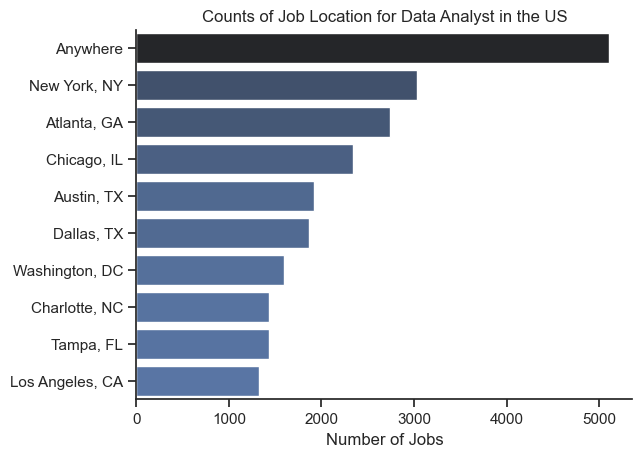

In [ ]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,  x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

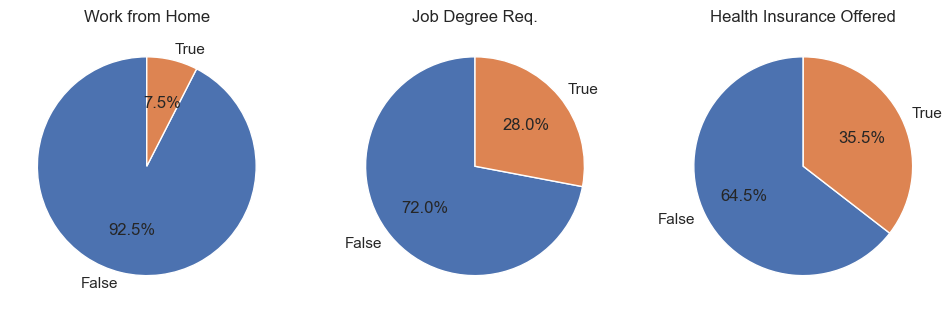

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

plt.show()

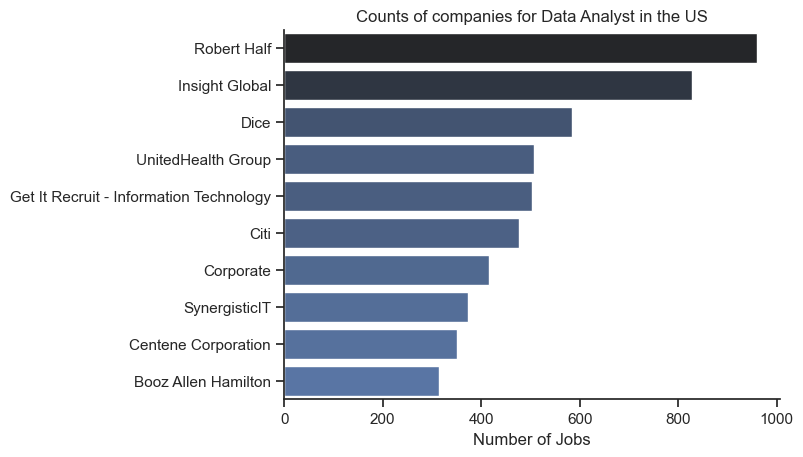

In [ ]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot,  x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()